In [1]:
import pandas as pd
import numpy as np

In [2]:
data_path = 'data/walmart-sales-dataset-of-45stores.csv'
data = pd.read_csv(data_path)

In [3]:
data.shape

(6435, 8)

In [6]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [11]:
data.isna().any().sum()

0

In [43]:
features = ['Date','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']
data.Date = pd.to_datetime(data.Date, format='%d-%m-%Y')

# data['day_of_week'] = data.Date.dayofweek
X = data.groupby('Store').get_group(1)[features]
y = data.groupby('Store').get_group(1)['Weekly_Sales']

X.Date.dt.month
X.Date.dt.dayofyear
X.Date.dt.isocalendar().week

,year,week,day
0,2010,5,5
1,2010,6,5
2,2010,7,5
3,2010,8,5
4,2010,9,5
...,...,...,...
138,2012,39,5
139,2012,40,5
140,2012,41,5
141,2012,42,5


In [44]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [64]:
data.Date.dt.date

0       2010-02-05
1       2010-02-12
2       2010-02-19
3       2010-02-26
4       2010-03-05
           ...    
6430    2012-09-28
6431    2012-10-05
6432    2012-10-12
6433    2012-10-19
6434    2012-10-26
Name: Date, Length: 6435, dtype: object

In [45]:
X

,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,2010-02-05,0,42.31,2.572,211.096358,8.106
1,2010-02-12,1,38.51,2.548,211.242170,8.106
2,2010-02-19,0,39.93,2.514,211.289143,8.106
3,2010-02-26,0,46.63,2.561,211.319643,8.106
4,2010-03-05,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...
138,2012-09-28,0,76.08,3.666,222.981658,6.908
139,2012-10-05,0,68.55,3.617,223.181477,6.573
140,2012-10-12,0,62.99,3.601,223.381296,6.573
141,2012-10-19,0,67.97,3.594,223.425723,6.573


In [50]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=2)
X,y = X.to_numpy(), y.to_numpy()

for i, (train_index, test_index) in enumerate(tss.split(X)):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

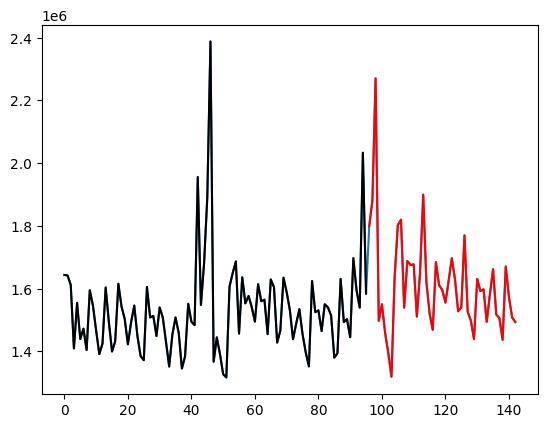

In [66]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(y)
plt.plot(np.arange(0,len(y_train)), y_train, 'k')
plt.plot(np.arange(len(y_train),len(y_train)+len(y_test)), y_test, 'r')

In [35]:
np.random.uniform(1, 2000, 10)
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

m = RandomForestRegressor(n_estimators=10000)
n = xgb.XGBRegressor()
print(str(m).split('('))

['RandomForestRegressor', 'n_estimators=10000)']


In [28]:
if str(m).split == 'RandomForestRegressor()': print('aaa')

In [36]:
type(n).__name__

'XGBRegressor'

In [ ]:
from sqlalchemy import insert, create_engine, select, Column, String, Integer, Table, MetaData

engine = create_engine("sqlite+pysqlite:///table.db")
conn = engine.connect()

metadata = MetaData()

table = Table('test', metadata,
              Column('id', Integer, primary_key=True),
              Column('name', String),
              Column('age', Integer)
              )

metadata.create_all(engine)

In [2]:
from sqlalchemy import insert, create_engine, inspect

engine = create_engine("sqlite+pysqlite:///database.db")
inspector = inspect(engine)

inspector.get_table_names()
for table_name in inspector.get_table_names():
   print(table_name)
   for column in inspector.get_columns(table_name):
       print("Column: %s" % column['name'])

Predictors
Column: id
Column: name
Column: mape
Column: refit_time_
Column: n_features_in_
Column: n_estimators
Column: max_depth
Column: min_samples_split
Column: min_samples_leaf
Column: max_features
Column: bootstrap
Column: eta
Column: gamma
Column: subsample
Column: lambda
Column: tree_method


In [ ]:
# conn.execute('INSERT INTO ola VALUES (?,?,?)',[(1,'MARCUS',33)])
conn = engine.connect()
meta = MetaData()

table = Table('ola', meta, autoload_with=engine)

In [64]:
query = insert(table).values(id=2, name='marcos', age=34)
print(query)
query.compile().params

INSERT INTO ola (id, name, age) VALUES (:id, :name, :age)


{'id': 2, 'name': 'marcos', 'age': 34}

In [65]:
conn.execute(query)

2024-03-05 11:13:15,642 INFO sqlalchemy.engine.Engine INSERT INTO ola (id, name, age) VALUES (?, ?, ?)
2024-03-05 11:13:15,643 INFO sqlalchemy.engine.Engine [cached since 222.3s ago] (2, 'marcos', 34)


In [66]:
conn.commit()

2024-03-05 11:13:15,660 INFO sqlalchemy.engine.Engine COMMIT


In [67]:
s = table.select()

In [68]:
print(s)

SELECT ola.id, ola.name, ola.age 
FROM ola


In [69]:
result = conn.execute(s)

2024-03-05 11:13:15,723 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-03-05 11:13:15,729 INFO sqlalchemy.engine.Engine SELECT ola.id, ola.name, ola.age 
FROM ola
2024-03-05 11:13:15,731 INFO sqlalchemy.engine.Engine [cached since 205.5s ago] ()


In [70]:
row = result.fetchone()

In [71]:
print(row)

(1, 'MMs', 33)


In [99]:
import numpy as np

query = insert(table).values(id=np.random.randint(3,1000), name='marcos', age=34)
conn.execute(query)
conn.commit()

s = table.select()
result = conn.execute(s)
rows = result.fetchall()
print(rows)

2024-03-05 11:17:14,316 INFO sqlalchemy.engine.Engine INSERT INTO ola (id, name, age) VALUES (?, ?, ?)
2024-03-05 11:17:14,318 INFO sqlalchemy.engine.Engine [cached since 461s ago] (574, 'marcos', 34)
2024-03-05 11:17:14,319 INFO sqlalchemy.engine.Engine COMMIT
2024-03-05 11:17:14,327 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-03-05 11:17:14,329 INFO sqlalchemy.engine.Engine SELECT ola.id, ola.name, ola.age 
FROM ola
2024-03-05 11:17:14,330 INFO sqlalchemy.engine.Engine [cached since 444.1s ago] ()
[(1, 'MMs', 33), (2, 'marcos', 34), (37, 'marcos', 34), (85, 'marcos', 34), (93, 'marcos', 34), (102, 'marcos', 34), (150, 'marcos', 34), (159, 'marcos', 34), (191, 'marcos', 34), (227, 'marcos', 34), (235, 'marcos', 34), (297, 'marcos', 34), (329, 'marcos', 34), (374, 'marcos', 34), (437, 'marcos', 34), (468, 'marcos', 34), (498, 'marcos', 34), (574, 'marcos', 34), (620, 'marcos', 34), (656, 'marcos', 34), (734, 'marcos', 34), (825, 'marcos', 34), (919, 'marcos', 34), (923, 'marcos

In [100]:
for row in rows:
    print(row)

(1, 'MMs', 33)
(2, 'marcos', 34)
(37, 'marcos', 34)
(85, 'marcos', 34)
(93, 'marcos', 34)
(102, 'marcos', 34)
(150, 'marcos', 34)
(159, 'marcos', 34)
(191, 'marcos', 34)
(227, 'marcos', 34)
(235, 'marcos', 34)
(297, 'marcos', 34)
(329, 'marcos', 34)
(374, 'marcos', 34)
(437, 'marcos', 34)
(468, 'marcos', 34)
(498, 'marcos', 34)
(574, 'marcos', 34)
(620, 'marcos', 34)
(656, 'marcos', 34)
(734, 'marcos', 34)
(825, 'marcos', 34)
(919, 'marcos', 34)
(923, 'marcos', 34)
(938, 'marcos', 34)


In [ ]:
from sqlalchemy import insert, create_engine, select, Table, MetaData

engine = create_engine("sqlite+pysqlite:///database.db")
conn = engine.connect()
meta = MetaData()
table = Table('X_data', meta, autoload_with=engine)

# i = table.insert().values([{'id':4,'1':45,'2':2}])
# conn.execute(i)
# conn.commit()

s = table.select().with_only_columns(table.c.id)
result = conn.execute(s)
rows = result.fetchall()
print(rows[-1][0])
conn.close()

In [7]:
d1 = {'name':'Maria','id':45,'age':2}
d2 = {'test':1}
d2.update(d1)
d2

{'test': 1, 'name': 'Maria', 'id': 45, 'age': 2}

In [8]:
from sqlalchemy import create_engine, MetaData, Table

engine = create_engine("sqlite+pysqlite:///database.db")
conn = engine.connect()
meta = MetaData()
table = Table('Predictors', meta, autoload_with=engine)

s = table.select()
result = conn.execute(s)
rows = result.fetchall()
print(rows)

print(meta.tables.keys())
conn.close()

[(1, 1, 'Random_Forest', 0.06415107124364083, 0.4528512954711914, 3, 3, 500, 10, 3, 3, '1', True, None, None, None, None, None), (2, 1, 'XGBoost', 0.06970581164653279, 0.06615662574768066, 3, 3, None, 20, None, None, None, None, 0.3, 0.0, 0.5, 0.5, 'auto'), (3, 1, 'Random_Forest', 0.0642324241244365, 0.023940324783325195, 3, 3, 40, 10, 4, 1, '1', False, None, None, None, None, None), (4, 1, 'XGBoost', 0.07500434517225608, 0.0453643798828125, 3, 3, None, 7, None, None, None, None, 0.5, 0.2, 0.5, 2.0, 'hist'), (5, 1, 'Random_Forest', 0.07009752292940585, 0.0034313201904296875, 3, 3, 5, 20, 3, 3, '1', False, None, None, None, None, None), (6, 1, 'XGBoost', 0.08417374608400657, 0.060755014419555664, 3, 3, None, 20, None, None, None, None, 0.9, 0.0, 0.5, 1.0, 'hist'), (7, 1, 'Random_Forest', 0.06462981597449192, 0.00401616096496582, 3, 3, 5, 20, 4, 3, 'log2', False, None, None, None, None, None), (8, 1, 'XGBoost', 0.07419764396109865, 0.1223444938659668, 3, 3, None, 50, None, None, None, No

In [23]:
from sqlalchemy import create_engine, MetaData

engine = create_engine("sqlite+pysqlite:///database.db")
meta = MetaData()
meta.reflect(bind=engine)
print(meta.tables.keys())

dict_keys(['Predictors', 'X_data', 'settings_data', 'target_prediction'])


In [21]:
from sqlalchemy import create_engine, MetaData, inspect

engine = create_engine("sqlite+pysqlite:///database.db")

# Create an Inspector object
inspector = inspect(engine)

# Get the schema names
inspector.get_table_names()

['Predictors', 'X_data', 'settings_data', 'target_prediction']

In [20]:
from sqlalchemy import create_engine, MetaData

engine = create_engine("sqlite+pysqlite:///database.db")
meta = MetaData()
meta.reflect(bind=engine)

meta.tables['settings_data'].columns.keys()

['id', 'target_id', 'X_id', 'date_time', 'store', 'test_fraction', 'n_splits']

In [30]:
from sqlalchemy import create_engine, MetaData, Table

engine = create_engine("sqlite+pysqlite:///database.db")
conn = engine.connect()
meta = MetaData()
table = Table('X_data', meta, autoload_with=engine)

s = table.select().where(table.c.id)
result = conn.execute(s)
rows = result.fetchall()

print(rows)

conn.close()

[]


In [27]:
from sqlalchemy import insert, create_engine, select, Table, MetaData

engine = create_engine("sqlite+pysqlite:///database.db")
conn = engine.connect()
meta = MetaData()
table = Table('X_data', meta, autoload_with=engine)

s = table.select().where((table.c.id == 4) & (table.c['1'] == 45)).with_only_columns(table.c.id, table.c['1'])
result = conn.execute(s)
rows = result.fetchall()
print(rows)
conn.close()

[(4, 45.0), (4, 45.0), (4, 45.0)]


In [29]:
class MyClass:
    def my_function(self):
        print("This will be executed.")
        return  # Immediately exits the function, skipping the rest of the code
        print("This will also be executed.")

    def another_function(self):
        print("Executing another_function...")
        self.my_function()
        print("Execution continues after my_function.")

# Creating an instance of MyClass
obj = MyClass()

# Calling another_function
obj.another_function()

Executing another_function...
This will be executed.
Execution continues after my_function.


In [40]:
from sqlalchemy import insert, create_engine, select, Table, MetaData, DateTime
import datetime
from sqlalchemy import insert, create_engine, select, Column, String, Integer, Table, MetaData

engine = create_engine("sqlite+pysqlite:///table.db")
conn = engine.connect()

metadata = MetaData()

table = Table('date', metadata,
              Column('date', DateTime)
             )

metadata.create_all(engine)

date_time = datetime.datetime.now()

conn = engine.connect()
meta = MetaData()
table = Table('date', meta, autoload_with=engine)

i = table.insert().values([{'date':date_time}])
conn.execute(i)
conn.commit()

s = table.select()
result = conn.execute(s)
rows = result.fetchall()
print(rows)
conn.close()

[(datetime.datetime(2024, 3, 6, 19, 56, 9, 217643),), (datetime.datetime(2024, 3, 6, 19, 56, 12, 289815),)]


In [6]:
from sqlalchemy import create_engine, Table, MetaData
import pandas as pd

engine = create_engine("sqlite+pysqlite:///table.db")
conn = engine.connect()

meta = MetaData()
table = Table('date', meta, autoload_with=engine)

s = table.select()
result = conn.execute(s)
rows = result.fetchall()
print(rows)
conn.close()

pd.to_datetime(rows[-1][0])

[(datetime.datetime(2024, 3, 6, 19, 56, 9, 217643),), (datetime.datetime(2024, 3, 6, 19, 56, 12, 289815),)]


Timestamp('2024-03-06 19:56:12.289815')

In [2]:
from sqlalchemy import create_engine, Table, MetaData, text
import pandas as pd

engine = create_engine("sqlite+pysqlite:///data/database.db")

query = text("SELECT id FROM settings_data")
conn = engine.connect()

id = conn.execute(query).fetchall()[0][0]

id
# for line in lines:
#     print(line)

1

In [16]:
engine = create_engine("sqlite+pysqlite:///data/database.db")
conn = engine.connect()

query = text("SELECT set_id, MAX(score_mape_test) AS m FROM Predictors")
query = text('SELECT id FROM Predictors ORDER BY id')

lines = conn.execute(query).fetchall()[-1][0]
lines

4

In [4]:
from sqlalchemy import create_engine, Table, MetaData, text

engine = create_engine("sqlite+pysqlite:///data/database.db")
metadata = MetaData()
conn = engine.connect()
table_predictors = Table('Predictors', metadata, autoload_with=engine)
table_X_data = Table('X_data', metadata, autoload_with=engine)
table_target = Table('target_prediction', metadata, autoload_with=engine)
table_settings = Table('settings_data', metadata, autoload_with=engine)

query_last_id = table_target.select().with_only_columns(table_target.c.id)
id_counts = conn.execute(query_last_id).fetchall()
print(id_counts)

[]


In [5]:
query_train = text("SELECT timeline FROM target_prediction WHERE train_test_prediction = 'train' AND set_id = :set_id")
conn.execute(query_train, {'set_id':1}).fetchall()

[('2010-02-05',),
 ('2010-02-12',),
 ('2010-02-19',),
 ('2010-02-26',),
 ('2010-03-05',),
 ('2010-03-12',),
 ('2010-03-19',),
 ('2010-03-26',),
 ('2010-04-02',),
 ('2010-04-09',),
 ('2010-04-16',),
 ('2010-04-23',),
 ('2010-04-30',),
 ('2010-05-07',),
 ('2010-05-14',),
 ('2010-05-21',),
 ('2010-05-28',),
 ('2010-06-04',),
 ('2010-06-11',),
 ('2010-06-18',),
 ('2010-06-25',),
 ('2010-07-02',),
 ('2010-07-09',),
 ('2010-07-16',),
 ('2010-07-23',),
 ('2010-07-30',),
 ('2010-08-06',),
 ('2010-08-13',),
 ('2010-08-20',),
 ('2010-08-27',),
 ('2010-09-03',),
 ('2010-09-10',),
 ('2010-09-17',),
 ('2010-09-24',),
 ('2010-10-01',),
 ('2010-10-08',),
 ('2010-10-15',),
 ('2010-10-22',),
 ('2010-10-29',),
 ('2010-11-05',),
 ('2010-11-12',),
 ('2010-11-19',),
 ('2010-11-26',),
 ('2010-12-03',),
 ('2010-12-10',),
 ('2010-12-17',),
 ('2010-12-24',),
 ('2010-12-31',),
 ('2011-01-07',),
 ('2011-01-14',),
 ('2011-01-21',),
 ('2011-01-28',),
 ('2011-02-04',),
 ('2011-02-11',),
 ('2011-02-18',),
 ('2011-02

In [9]:
query_prediction = text("SELECT y FROM target_prediction WHERE pred_id = :pred_id AND train_test_prediction = 'prediction' AND predictor = :name_pred")
conn.execute(query_prediction, {'pred_id':0, 'name_pred':'Random_Forest'}).fetchall()

[]

In [22]:
query_old_mape = text("SELECT MAX(score_mape_test) AS second FROM Predictors WHERE score_mape_test < (SELECT MAX(score_mape_test) FROM Predictors)")
conn.execute(query_old_mape).fetchall()[0][0]

0.11844945481603131

In [21]:
query_old_mape = text("SELECT score_mape_test FROM Predictors ORDER BY score_mape_test")
conn.execute(query_old_mape).fetchall()

[(-0.8009439161109935,),
 (-0.5456583592768378,),
 (-0.5346374259731221,),
 (-0.5174577579278368,),
 (-0.32475257548816927,),
 (-0.28736913783464324,),
 (-0.2810945585248805,),
 (-0.2577908535605413,),
 (-0.25467560898647257,),
 (-0.25420579895248885,),
 (-0.15939412785021156,),
 (-0.01595241005523995,),
 (0.003370925553644266,),
 (0.02040235622513853,),
 (0.023593866613523584,),
 (0.026071497319427595,),
 (0.026726613409158828,),
 (0.08014793825181876,),
 (0.10340706378410558,),
 (0.11283464821501343,),
 (0.11844945481603131,),
 (0.12661235789041714,)]

In [30]:
str_score = 'score_mape_test'
query_old = text(f"SELECT MAX({str_score}) AS second FROM Predictors WHERE {str_score} < (SELECT MAX({str_score}) FROM Predictors)")
conn.execute(query_old).fetchall()[0][0]

0.15321220417321213